##Experiment ->3

###Aim: Implementation of a simple neural network to classify both linearly separable and non-linearly separable datasets using numpy.


####1. Linearly separable dataset (make_classification)

In [30]:
from sklearn.datasets import make_classification, make_moons
import numpy as np
import matplotlib.pyplot as plt

In [31]:
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2.0,
    random_state=42
)

y = y.reshape(-1, 1)

In [32]:
class Perceptron:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.W = np.zeros((X.shape[1], 1))
        self.b = 0

        for _ in range(self.epochs):
            z = np.dot(X, self.W) + self.b
            y_pred = np.where(z >= 0, 1, 0)
            error = y - y_pred

            self.W += self.lr * np.dot(X.T, error)
            self.b += self.lr * np.sum(error)

    def predict(self, X):
        z = np.dot(X, self.W) + self.b
        return np.where(z >= 0, 1, 0)

In [33]:
model = Perceptron()
model.fit(X, y)

predictions = model.predict(X)
accuracy = np.mean(predictions == y)

print("Accuracy:", accuracy)

Accuracy: 0.975


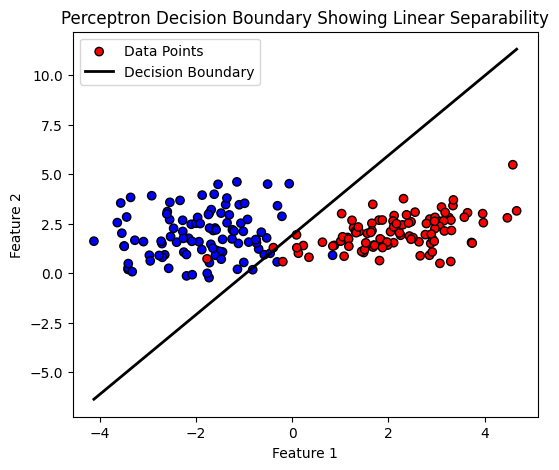

In [ ]:
w1, w2 = model.W.flatten()
b = model.b

x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)

y_vals = -(w1 * x_vals + b) / w2

# Plot
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr', edgecolors='k', label="Data Points")
plt.plot(x_vals, y_vals, color='black', linewidth=2, label="Decision Boundary")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Perceptron Decision Boundary Showing Linear Separability")
plt.legend()
plt.show()


####2:Multi-Layer Neural Network(make_moons)

In [35]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
y = y.reshape(-1, 1)

In [36]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return z * (1 - z)

In [37]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.output = sigmoid(self.z2)
        return self.output

    def backward(self, X, y, lr):
        error = y - self.output
        d_output = error * sigmoid_derivative(self.output)

        error_hidden = d_output.dot(self.W2.T)
        d_hidden = error_hidden * sigmoid_derivative(self.a1)

        self.W2 += self.a1.T.dot(d_output) * lr
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * lr
        self.W1 += X.T.dot(d_hidden) * lr
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

    def train(self, X, y, epochs=5000, lr=0.1):
        for _ in range(epochs):
            self.forward(X)
            self.backward(X, y, lr)


In [38]:
nn = NeuralNetwork(input_size=2, hidden_size=10, output_size=1)
nn.train(X, y)

predictions = nn.forward(X) > 0.5
accuracy = np.mean(predictions == y)

print("Accuracy:", accuracy)


Accuracy: 0.99


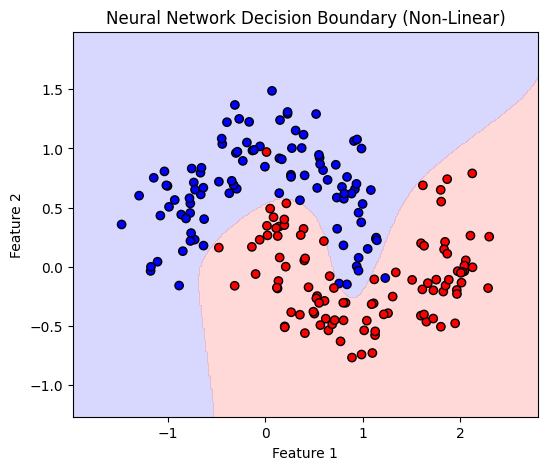

In [ ]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

grid = np.c_[xx.ravel(), yy.ravel()]
Z = nn.forward(grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z > 0.5, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='bwr', edgecolors='k')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Neural Network Decision Boundary (Non-Linear)")
plt.show()
